In [5]:
import pandas as pd
from molvecgen.vectorizers import SmilesVectorizer
from plotai import PlotAI

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [48]:
targets = ['CS50', 'IC50', 'SI']

In [76]:
df = pd.read_csv('small.csv')

In [77]:
df_w = df[['IC50, mmg/ml', 'SMILES']]

In [78]:
PandasTools.AddMoleculeColumnToFrame(df_w, 'SMILES','Molecule')
df_w[["SMILES", "Molecule"]]

[19:35:25] Conflicting single bond directions around double bond at index 55.
[19:35:25]   BondStereo set to STEREONONE and single bond directions set to NONE.
c:\Users\po6wi\AppData\Local\Programs\Python\Python311\Lib\site-packages\rdkit\Chem\PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


,SMILES,Molecule
0,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x00000206A8A...
1,OCC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x00000206A8A...
2,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x00000206A8A...
3,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,<rdkit.Chem.rdchem.Mol object at 0x00000206A8A...
4,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,<rdkit.Chem.rdchem.Mol object at 0x00000206A8A...
...,...,...
1463,CCCCCCCc1c(OC)c(C)c(=O)oc1,<rdkit.Chem.rdchem.Mol object at 0x00000206AC0...
1464,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,<rdkit.Chem.rdchem.Mol object at 0x00000206AC0...
1465,COc(cc1)cc(c12)ccc(c2)-c(c3C([O-])=O)c(C([O-])...,<rdkit.Chem.rdchem.Mol object at 0x00000206AC0...
1466,c1ccc(C([O-])=O)c(c1C([O-])=O)-c(c2)ccc(c23)cc...,<rdkit.Chem.rdchem.Mol object at 0x00000206AC0...


In [79]:
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(df_w.Molecule.values, )

In [80]:
mol = smivec.transform(df_w.Molecule.values)

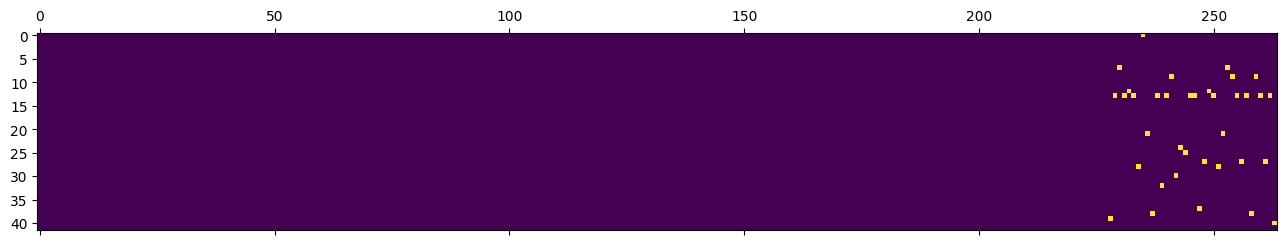

In [81]:
plt.matshow(mol[0].T)

In [53]:
data = pd.read_csv('big.csv').drop(['Unnamed: 0'], axis=1)

In [83]:
cols = ['Title',
 'IC50',
 'SMILES',
 'AUTOCORR2D_1',
 'AUTOCORR2D_2',
 'AUTOCORR2D_3',
 'AUTOCORR2D_4',
 'AUTOCORR2D_5',
 'AUTOCORR2D_6',
 'AUTOCORR2D_7',
 'AUTOCORR2D_8',
 'AUTOCORR2D_9',
 'AUTOCORR2D_10',
 'AUTOCORR2D_11',
 'AUTOCORR2D_12',
 'AUTOCORR2D_13',
 'AUTOCORR2D_14',
 'AUTOCORR2D_15',
 'AUTOCORR2D_16',
 'AUTOCORR2D_17',
 'AUTOCORR2D_18',
 'AUTOCORR2D_19',
 'AUTOCORR2D_20',
 'AUTOCORR2D_21',
 'AUTOCORR2D_22',
 'AUTOCORR2D_23',
 'AUTOCORR2D_24',
 'AUTOCORR2D_25',
 'AUTOCORR2D_26',
 'AUTOCORR2D_27',
 'AUTOCORR2D_28',
 'AUTOCORR2D_29',
 'AUTOCORR2D_30',
 'AUTOCORR2D_31',
 'AUTOCORR2D_32',
 'AUTOCORR2D_33',
 'AUTOCORR2D_34',
 'AUTOCORR2D_35',
 'AUTOCORR2D_36',
 'AUTOCORR2D_37',
 'AUTOCORR2D_38',
 'AUTOCORR2D_39',
 'AUTOCORR2D_40',
 'AUTOCORR2D_41',
 'AUTOCORR2D_42',
 'AUTOCORR2D_43',
 'AUTOCORR2D_44',
 'AUTOCORR2D_45',
 'AUTOCORR2D_46',
 'AUTOCORR2D_47',
 'AUTOCORR2D_48',
 'AUTOCORR2D_49',
 'AUTOCORR2D_50',
 'AUTOCORR2D_51',
 'AUTOCORR2D_52',
 'AUTOCORR2D_53',
 'AUTOCORR2D_54',
 'AUTOCORR2D_55',
 'AUTOCORR2D_56',
 'AUTOCORR2D_57',
 'AUTOCORR2D_58',
 'AUTOCORR2D_59',
 'AUTOCORR2D_60',
 'AUTOCORR2D_61',
 'AUTOCORR2D_62',
 'AUTOCORR2D_63',
 'AUTOCORR2D_64',
 'AUTOCORR2D_65',
 'AUTOCORR2D_66',
 'AUTOCORR2D_67',
 'AUTOCORR2D_68',
 'AUTOCORR2D_69',
 'AUTOCORR2D_70',
 'AUTOCORR2D_71',
 'AUTOCORR2D_72',
 'AUTOCORR2D_73',
 'AUTOCORR2D_74',
 'AUTOCORR2D_75',
 'AUTOCORR2D_76',
 'AUTOCORR2D_77',
 'AUTOCORR2D_78',
 'AUTOCORR2D_79',
 'AUTOCORR2D_80',
 'AUTOCORR2D_81',
 'AUTOCORR2D_82',
 'AUTOCORR2D_83',
 'AUTOCORR2D_84',
 'AUTOCORR2D_85',
 'AUTOCORR2D_86',
 'AUTOCORR2D_87',
 'AUTOCORR2D_88',
 'AUTOCORR2D_89',
 'AUTOCORR2D_90',
 'AUTOCORR2D_91',
 'AUTOCORR2D_92',
 'AUTOCORR2D_93',
 'AUTOCORR2D_94',
 'AUTOCORR2D_95',
 'AUTOCORR2D_96',
 'AUTOCORR2D_97',
 'AUTOCORR2D_98',
 'AUTOCORR2D_99',
 'AUTOCORR2D_100',
 'AUTOCORR2D_101',
 'AUTOCORR2D_102',
 'AUTOCORR2D_103',
 'AUTOCORR2D_104',
 'AUTOCORR2D_105',
 'AUTOCORR2D_106',
 'AUTOCORR2D_107',
 'AUTOCORR2D_108',
 'AUTOCORR2D_109',
 'AUTOCORR2D_110',
 'AUTOCORR2D_111',
 'AUTOCORR2D_112',
 'AUTOCORR2D_113',
 'AUTOCORR2D_114',
 'AUTOCORR2D_115',
 'AUTOCORR2D_116',
 'AUTOCORR2D_117',
 'AUTOCORR2D_118',
 'AUTOCORR2D_119',
 'AUTOCORR2D_120',
 'AUTOCORR2D_121',
 'AUTOCORR2D_122',
 'AUTOCORR2D_123',
 'AUTOCORR2D_124',
 'AUTOCORR2D_125',
 'AUTOCORR2D_126',
 'AUTOCORR2D_127',
 'AUTOCORR2D_128',
 'AUTOCORR2D_129',
 'AUTOCORR2D_130',
 'AUTOCORR2D_131',
 'AUTOCORR2D_132',
 'AUTOCORR2D_133',
 'AUTOCORR2D_134',
 'AUTOCORR2D_135',
 'AUTOCORR2D_136',
 'AUTOCORR2D_137',
 'AUTOCORR2D_138',
 'AUTOCORR2D_139',
 'AUTOCORR2D_140',
 'AUTOCORR2D_141',
 'AUTOCORR2D_142',
 'AUTOCORR2D_143',
 'AUTOCORR2D_144',
 'AUTOCORR2D_145',
 'AUTOCORR2D_146',
 'AUTOCORR2D_147',
 'AUTOCORR2D_148',
 'AUTOCORR2D_149',
 'AUTOCORR2D_150',
 'AUTOCORR2D_151',
 'AUTOCORR2D_152',
 'AUTOCORR2D_153',
 'AUTOCORR2D_154',
 'AUTOCORR2D_155',
 'AUTOCORR2D_156',
 'AUTOCORR2D_157',
 'AUTOCORR2D_158',
 'AUTOCORR2D_159',
 'AUTOCORR2D_160',
 'AUTOCORR2D_161',
 'AUTOCORR2D_162',
 'AUTOCORR2D_163',
 'AUTOCORR2D_164',
 'AUTOCORR2D_165',
 'AUTOCORR2D_166',
 'AUTOCORR2D_167',
 'AUTOCORR2D_168',
 'AUTOCORR2D_169',
 'AUTOCORR2D_170',
 'AUTOCORR2D_171',
 'AUTOCORR2D_172',
 'AUTOCORR2D_173',
 'AUTOCORR2D_174',
 'AUTOCORR2D_175',
 'AUTOCORR2D_176',
 'AUTOCORR2D_177',
 'AUTOCORR2D_178',
 'AUTOCORR2D_179',
 'AUTOCORR2D_180',
 'AUTOCORR2D_181',
 'AUTOCORR2D_182',
 'AUTOCORR2D_183',
 'AUTOCORR2D_184',
 'AUTOCORR2D_185',
 'AUTOCORR2D_186',
 'AUTOCORR2D_187',
 'AUTOCORR2D_188',
 'AUTOCORR2D_189',
 'AUTOCORR2D_190',
 'AUTOCORR2D_191',
 'AUTOCORR2D_192',
 'MaxAbsEStateIndex',
 'MaxEStateIndex',
 'MinAbsEStateIndex',
 'MinEStateIndex',
 'qed',
 'MolWt',
 'HeavyAtomMolWt',
 'ExactMolWt',
 'NumValenceElectrons',
 'NumRadicalElectrons',
 'MaxPartialCharge',
 'MinPartialCharge',
 'MaxAbsPartialCharge',
 'MinAbsPartialCharge',
 'FpDensityMorgan1',
 'FpDensityMorgan2',
 'FpDensityMorgan3',
 'BCUT2D_MWHI',
 'BCUT2D_MWLOW',
 'BCUT2D_CHGHI',
 'BCUT2D_CHGLO',
 'BCUT2D_LOGPHI',
 'BCUT2D_LOGPLOW',
 'BCUT2D_MRHI',
 'BCUT2D_MRLOW',
 'AvgIpc',
 'BalabanJ',
 'BertzCT',
 'Chi0',
 'Chi0n',
 'Chi0v',
 'Chi1',
 'Chi1n',
 'Chi1v',
 'Chi2n',
 'Chi2v',
 'Chi3n',
 'Chi3v',
 'Chi4n',
 'Chi4v',
 'HallKierAlpha',
 'Ipc',
 'Kappa1',
 'Kappa2',
 'Kappa3',
 'LabuteASA',
 'PEOE_VSA1',
 'PEOE_VSA10',
 'PEOE_VSA11',
 'PEOE_VSA12',
 'PEOE_VSA13',
 'PEOE_VSA14',
 'PEOE_VSA2',
 'PEOE_VSA3',
 'PEOE_VSA4',
 'PEOE_VSA5',
 'PEOE_VSA6',
 'PEOE_VSA7',
 'PEOE_VSA8',
 'PEOE_VSA9',
 'SMR_VSA1',
 'SMR_VSA10',
 'SMR_VSA2',
 'SMR_VSA3',
 'SMR_VSA4',
 'SMR_VSA5',
 'SMR_VSA6',
 'SMR_VSA7',
 'SMR_VSA8',
 'SMR_VSA9',
 'SlogP_VSA1',
 'SlogP_VSA10',
 'SlogP_VSA11',
 'SlogP_VSA12',
 'SlogP_VSA2',
 'SlogP_VSA3',
 'SlogP_VSA4',
 'SlogP_VSA5',
 'SlogP_VSA6',
 'SlogP_VSA7',
 'SlogP_VSA8',
 'SlogP_VSA9',
 'TPSA',
 'EState_VSA1',
 'EState_VSA10',
 'EState_VSA11',
 'EState_VSA2',
 'EState_VSA3',
 'EState_VSA4',
 'EState_VSA5',
 'EState_VSA6',
 'EState_VSA7',
 'EState_VSA8',
 'EState_VSA9',
 'VSA_EState1',
 'VSA_EState10',
 'VSA_EState2',
 'VSA_EState3',
 'VSA_EState4',
 'VSA_EState5',
 'VSA_EState6',
 'VSA_EState7',
 'VSA_EState8',
 'VSA_EState9',
 'FractionCSP3',
 'HeavyAtomCount',
 'NHOHCount',
 'NOCount',
 'NumAliphaticCarbocycles',
 'NumAliphaticHeterocycles',
 'NumAliphaticRings',
 'NumAromaticCarbocycles',
 'NumAromaticHeterocycles',
 'NumAromaticRings',
 'NumHAcceptors',
 'NumHDonors',
 'NumHeteroatoms',
 'NumRotatableBonds',
 'NumSaturatedCarbocycles',
 'NumSaturatedHeterocycles',
 'NumSaturatedRings',
 'RingCount',
 'MolLogP',
 'MolMR']

In [84]:
X = data[cols]

In [85]:
data.describe()

,IC50,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,AUTOCORR2D_7,AUTOCORR2D_8,AUTOCORR2D_9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,...,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000
mean,7.813503,3.488469,3.838720,3.857378,3.774063,3.671413,3.556564,3.398857,3.188270,3.226228,...,0.153174,0.107485,0.014762,0.001045,0.018116,0.059681,0.000082,0.092449,0.109877,0.037249
std,48.489710,0.255652,0.272628,0.319040,0.383174,0.450673,0.521201,0.624488,0.768074,0.240756,...,0.380644,0.320979,0.123306,0.033963,0.134807,0.246452,0.009081,0.303383,0.637422,0.193538
min,0.000010,1.466000,1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.696000,3.315000,3.659000,3.651000,3.533000,3.393000,3.258000,3.104000,2.899000,3.068000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.635000,3.486000,3.842000,3.866000,3.791000,3.694000,3.585000,3.445000,3.291000,3.226000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.934000,3.668000,4.028000,4.075000,4.034000,3.976000,3.897000,3.786000,3.658000,3.391000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3183.600000,4.848000,5.295000,5.740000,5.941000,5.824000,5.936000,6.070000,6.276000,4.593000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,18.000000,3.000000


In [88]:
X = X.dropna(subset='IC50', axis=0)

In [89]:
X.describe()

,IC50,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,AUTOCORR2D_7,AUTOCORR2D_8,AUTOCORR2D_9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,...,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000,36377.000000
mean,7.813503,3.488469,3.838720,3.857378,3.774063,3.671413,3.556564,3.398857,3.188270,3.226228,...,0.153174,0.107485,0.014762,0.001045,0.018116,0.059681,0.000082,0.092449,0.109877,0.037249
std,48.489710,0.255652,0.272628,0.319040,0.383174,0.450673,0.521201,0.624488,0.768074,0.240756,...,0.380644,0.320979,0.123306,0.033963,0.134807,0.246452,0.009081,0.303383,0.637422,0.193538
min,0.000010,1.466000,1.540000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.312000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.696000,3.315000,3.659000,3.651000,3.533000,3.393000,3.258000,3.104000,2.899000,3.068000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.635000,3.486000,3.842000,3.866000,3.791000,3.694000,3.585000,3.445000,3.291000,3.226000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.934000,3.668000,4.028000,4.075000,4.034000,3.976000,3.897000,3.786000,3.658000,3.391000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3183.600000,4.848000,5.295000,5.740000,5.941000,5.824000,5.936000,6.070000,6.276000,4.593000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,18.000000,3.000000


In [73]:
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
import pandas as pd

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X.drop(['Unnamed: 0', 'Title', 'IC50', 'SMILES'], axis=1), X['IC50'], test_size=0.33, random_state=42)

In [24]:
X_train

,AUTOCORR2D_1,AUTOCORR2D_2,AUTOCORR2D_3,AUTOCORR2D_4,AUTOCORR2D_5,AUTOCORR2D_6,AUTOCORR2D_7,AUTOCORR2D_8,AUTOCORR2D_9,AUTOCORR2D_10,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
15019,3.455,3.823,3.788,3.647,3.655,3.408,3.226,3.378,3.323,3.629,...,0,0,0,0,0,0,0,0,0,0
12034,2.962,3.355,3.283,3.039,2.590,2.233,1.845,1.021,2.825,3.166,...,0,0,0,0,0,0,0,0,0,0
29795,3.423,3.682,3.844,3.886,3.872,3.842,3.672,3.196,3.208,3.447,...,0,0,0,0,0,0,0,0,2,0
16599,3.343,3.692,3.682,3.669,3.474,3.179,3.043,3.086,3.061,3.329,...,0,0,0,0,0,0,0,0,0,0
8295,3.327,3.757,3.780,3.490,3.162,2.945,2.708,2.121,2.958,3.285,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,3.424,3.762,3.810,3.812,3.710,3.617,3.545,3.264,3.234,3.502,...,0,0,0,0,0,0,0,0,0,0
6265,3.789,4.048,4.109,3.986,3.932,3.832,3.630,3.484,3.414,3.706,...,0,1,0,0,0,0,0,0,1,0
11284,3.157,3.582,3.429,3.252,3.055,2.797,2.127,0.773,2.895,3.246,...,0,0,0,0,0,1,0,0,0,0
860,3.583,3.972,4.062,4.101,4.105,4.114,3.892,3.666,3.475,3.821,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

In [12]:
X_train

,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,Pictures,HeavyAtomCount,NHOHCount,NOCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumAliphaticHeterocycles,RingCount,MW,LogP,MR,TPSA
1413,320.433,4,1,47.92,NaN,23,1,4,4,1,4,3,128,1,1,3,320.429,3.72100,88.9058,47.92
832,440.457,6,1,89.88,NaN,33,1,6,6,1,6,6,164,5,0,5,440.451,5.11672,124.8843,89.88
1407,341.272,1,0,9.23,NaN,20,0,1,1,0,3,1,110,1,1,3,341.264,5.44350,82.3910,9.23
931,605.584,8,1,135.17,NaN,44,1,12,10,1,15,6,226,5,1,6,605.581,3.93790,151.1052,135.17
236,220.320,2,0,62.11,287.0,16,0,4,3,0,4,3,86,0,0,2,220.320,3.31028,63.9100,62.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,472.505,4,5,110.27,NaN,36,5,7,5,5,8,5,174,6,0,6,472.313,4.54500,145.0512,110.27
1154,278.697,4,4,85.08,NaN,19,4,5,5,4,6,3,98,2,0,2,278.695,2.90280,74.1051,85.08
1318,252.272,3,0,39.44,NaN,19,0,3,3,0,3,2,94,3,0,3,252.269,3.46860,74.4720,39.44
884,812.925,10,6,191.72,NaN,60,6,12,12,6,12,11,310,4,0,6,812.916,8.08684,228.0926,191.72


array([[<Axes: title={'center': 'IC50'}>]], dtype=object)

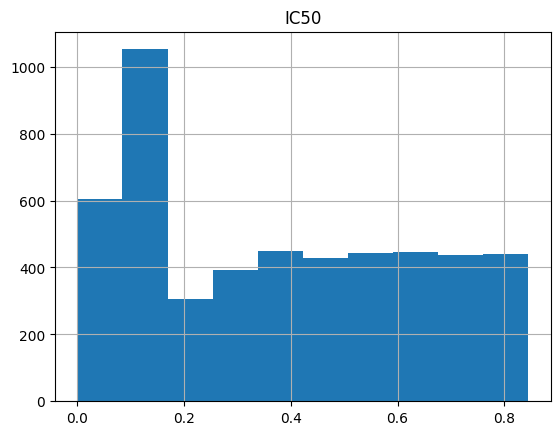

In [43]:
pd.DataFrame(X['IC50'][:5000]).hist()

In [33]:
model = CatBoostRegressor()
model.fit(X_train, y_train, eval_set=Pool(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.084069
0:	learn: 49.0645904	test: 46.8969180	best: 46.8969180 (0)	total: 58.7ms	remaining: 58.6s
1:	learn: 48.5733888	test: 46.8967428	best: 46.8967428 (1)	total: 105ms	remaining: 52.1s
2:	learn: 48.5075462	test: 46.8961907	best: 46.8961907 (2)	total: 119ms	remaining: 39.5s
3:	learn: 48.3339722	test: 46.9001626	best: 46.8961907 (2)	total: 162ms	remaining: 40.3s
4:	learn: 48.2550174	test: 46.8954575	best: 46.8954575 (4)	total: 201ms	remaining: 40.1s
5:	learn: 47.9981492	test: 46.6298551	best: 46.6298551 (5)	total: 247ms	remaining: 41s
6:	learn: 47.9402719	test: 46.6285235	best: 46.6285235 (6)	total: 300ms	remaining: 42.6s
7:	learn: 47.7859616	test: 46.6299352	best: 46.6285235 (6)	total: 385ms	remaining: 47.7s
8:	learn: 47.6380726	test: 46.6289385	best: 46.6285235 (6)	total: 431ms	remaining: 47.5s
9:	learn: 47.3884767	test: 46.6272280	best: 46.6272280 (9)	total: 491ms	remaining: 48.7s
10:	learn: 47.1098545	test: 46.6191368	best: 46.6191368 (10)	total: 538ms	remaini

In [44]:
model.score(X_test, y_test)

0.09595544066376083

In [29]:
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

In [30]:
model = CatBoostRegressor()
model.grid_search(grid, X=X.drop(['Unnamed: 0', 'Title', 'IC50', 'SMILES'], axis=1), y=X['IC50'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 49.6512911	test: 45.8372189	best: 45.8372189 (0)	total: 25.6ms	remaining: 25.5s
1:	learn: 49.5441715	test: 45.7787127	best: 45.7787127 (1)	total: 54.1ms	remaining: 27s
2:	learn: 49.4022658	test: 45.7259762	best: 45.7259762 (2)	total: 99.2ms	remaining: 33s
3:	learn: 49.1650853	test: 45.4719816	best: 45.4719816 (3)	total: 135ms	remaining: 33.5s
4:	learn: 48.8757647	test: 45.4364203	best: 45.4364203 (4)	total: 164ms	remaining: 32.7s
5:	learn: 48.7056353	test: 45.3907634	best: 45.3907634 (5)	total: 194ms	remaining: 32.1s
6:	learn: 48.5975531	test: 45.3332988	best: 45.3332988 (6)	total: 218ms	remaining: 30.9s
7:	learn: 48.3710585	test: 45.0986805	best: 45.0986805 (7)	total: 246ms	remaining: 30.5s
8:	learn: 48.2295215	test: 45.0497709	best: 45.0497709 (8)	total: 270ms	remaining: 29.7s
9:	learn: 47.8344811	test: 44.7129547	best: 44.7129547 (9)	total: 298ms	remaining: 29.5s
10:	learn: 47.7321319	test: 44.6602916	best: 44.6602916 (10)	total: 327ms	remaining: 29.4s
11:	learn: 47.601493

KeyboardInterrupt: 

In [22]:
model.score(X_test, y_test)

-0.04459046492244423